Sampling chain 0, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━  66% 0:00:03 / 0:00:09

Sampling chain 0, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━  69% 0:00:03 / 0:00:09

Output()

Sampling chain 1, 121 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━  65% 0:00:01 / 0:00:00

ERROR:pymc.stats.convergence:There were 1000 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


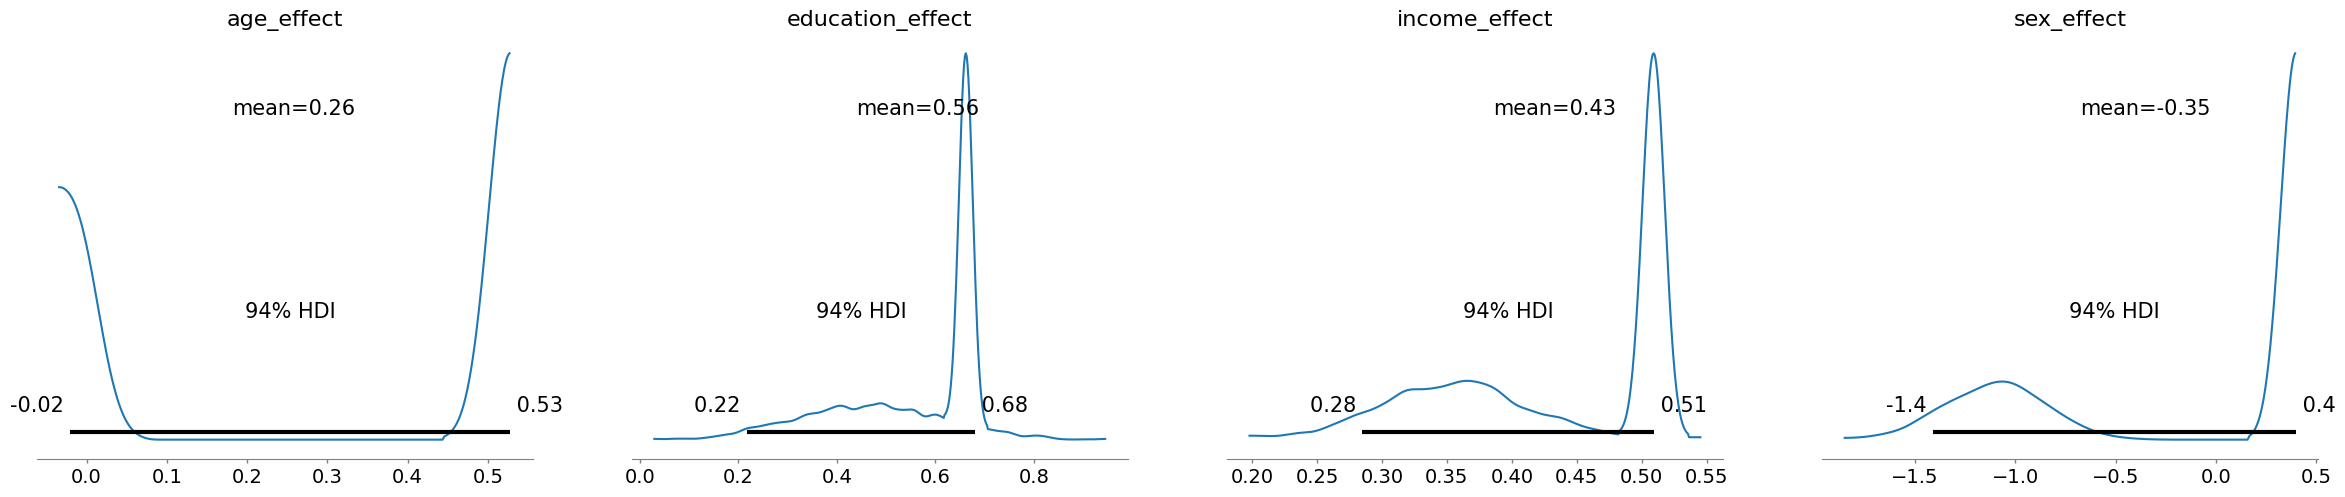

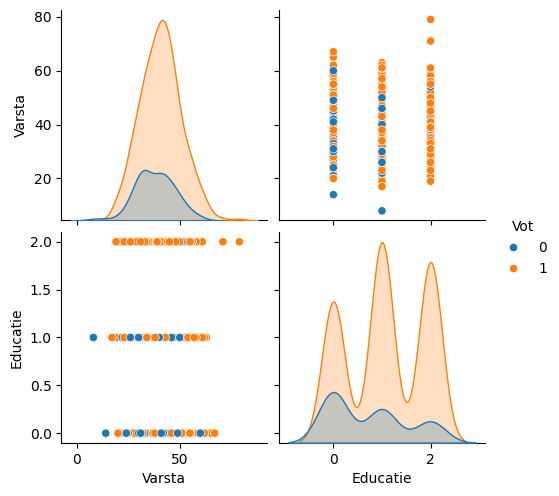

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


WAIC: Computed from 2000 posterior samples and 500 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -13342.12  1284.07
p_waic    13097.08        -

There has been a warning during the calculation. Please check the results., LOO: Computed from 2000 posterior samples and 500 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -2385.07   209.79
p_loo     2140.02        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)      396   79.2%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)  104   20.8%



/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


In [18]:
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az


data = pd.read_csv('date_alegeri_turul2.csv')

with pm.Model() as model:
    age_effect = pm.Normal('age_effect', mu=0, sigma=10)
    sex_effect = pm.Normal('sex_effect', mu=0, sigma=10)
    education_effect = pm.Normal('education_effect', mu=0, sigma=10)
    income_effect = pm.Normal('income_effect', mu=0, sigma=10)

    logit_p = (age_effect * data['Varsta'] +
               sex_effect * data['Sex'] +
               education_effect * data['Educatie'] +
               income_effect * data['Venit'])

    vote = pm.Bernoulli('vote', p=pm.math.sigmoid(logit_p), observed=data['Vot'])
    trace = pm.sample(
        1000,
        return_inferencedata=True,
        tune=1500,
        target_accept=0.94,
        idata_kwargs={'log_likelihood': True}  )

    az.plot_posterior(trace)

    sns.pairplot(data, hue='Vot', vars=['Varsta', 'Educatie'])
    plt.show()


waic = pm.waic(trace, model)
loo = pm.loo(trace, model)
print(f'WAIC: {waic}, LOO: {loo}')



Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━  90% 0:00:04 / 0:00:31

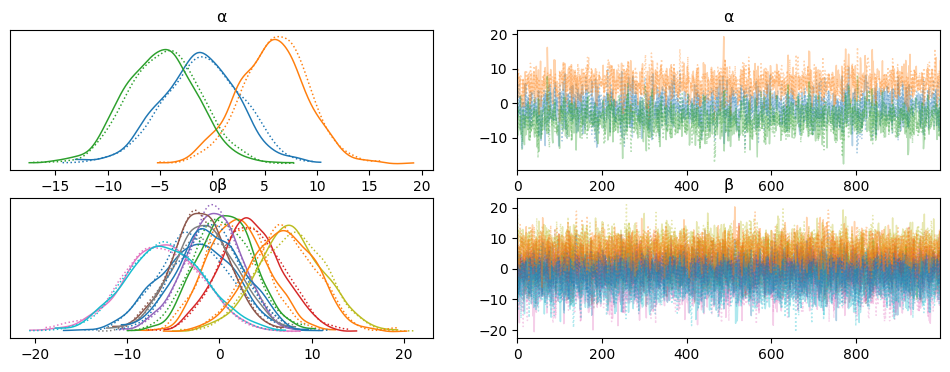

TypeError: log likelihood not found in inference data object

In [19]:
import pymc as pm
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import arviz as az
import matplotlib.pyplot as plt

data = pd.read_csv('iris.csv')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :4])
species = pd.Categorical(data['species']).codes

with pm.Model() as model_softmax:

    α = pm.Normal('α', mu=0, sigma=5, shape=3)
    β = pm.Normal('β', mu=0, sigma=5, shape=(4, 3))

    logits = pm.math.dot(data_scaled, β) + α

    p = pm.math.softmax(logits, axis=1)

    y = pm.Categorical('y', p=p, observed=species)

    trace = pm.sample(1000, target_accept=0.9)

with model_softmax:
    az.plot_trace(trace)
    plt.show()

waic = az.waic(trace)
print(f'WAIC: {waic.waic}')
